<a href="https://colab.research.google.com/github/mahapara2411/Sentiment-Analysis/blob/master/SMS_Spam_Ham_classification_using_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import wordcloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize 
from nltk.tokenize import word_tokenize 



In [5]:
#Loading the Dataset
from google.colab import files
uploaded=files.upload()

Saving SMSSpamCollection.txt to SMSSpamCollection.txt


In [6]:
data=pd.read_csv('SMSSpamCollection.txt', sep='\t',
                           names=["label", "message"])
data.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.describe()


,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

Text(0.5, 1.0, 'Number of ham and spam messages')

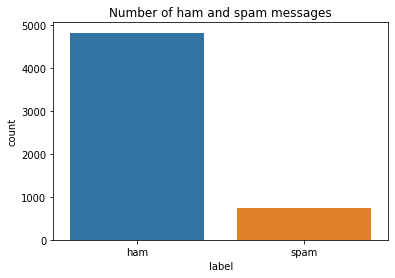

In [11]:
sns.countplot(data['label'])
plt.xlabel('label')
plt.title('Number of ham and spam messages')

In [12]:
data['spam'] = data['label'].map( {'spam': 1, 'ham': 0} ).astype(int)
data.head(10)

,label,message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [0]:
data_ham  = data[data['spam'] == 0].copy()
data_spam = data[data['spam'] == 1].copy()

In [0]:
#Wordcloud
def show_wordcloud(data_spam_or_ham, title):
    message = ' '.join(data_spam_or_ham['message'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(message)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

Ham ***Wordcloud***

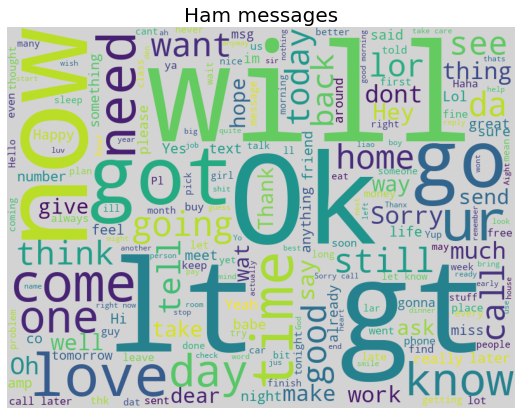

In [15]:
show_wordcloud(data_ham, "Ham messages")


Spam ***Wordcloud***

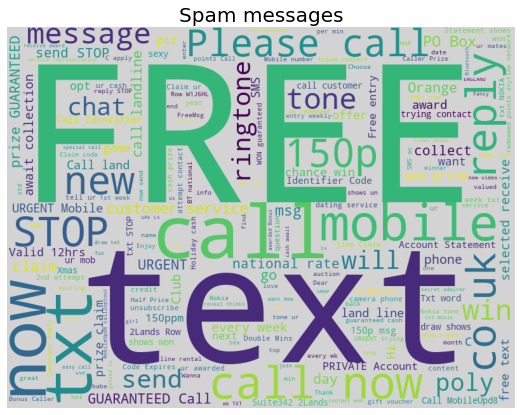

In [16]:
show_wordcloud(data_spam, "Spam messages")


Part 2: Preprocessing
Basic preprocessing for common NLP tasks includes converting text to lowercase and removing punctuation and stopwords.
Further steps, especially for text classification tasks, are:

a.Tokenization
b.Vectorization and
c.TF-IDF weighting
Lets apply these approaches on the SMS messages.

2.1 Remove Punctuation and Stopwords
Punctuation
We use the punctuation list from the string library:

In [17]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

***Stopwords***

Stop words are words like “and”, “the”, “him”, which are presumed to be uninformative in representing the content of a text,
and which may be removed to avoid them being construed as signal for prediction.
Sometimes, however, similar words are useful for prediction, such as in classifying writing style or personality.



In [18]:
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

y=pd.get_dummies(data['label'])
y=y.iloc[:,1].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [0]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [0]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)

In [26]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
pd.crosstab(y_test,y_pred)


0.9856502242152466
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       955
           1       0.94      0.96      0.95       160

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



col_0,0,1
row_0,,
0,946,9
1,7,153


Term Frequency times Inverse Document ***Frequency*** ***bold text***

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
#Vectorization using TFIDF
X1=data.message
y=data.label
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(X1)
feature_names = vectorizer.get_feature_names()
feature_names

['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '084

In [0]:
X = X.toarray()

In [36]:
X.shape

(5572, 8712)

In [37]:
y.shape

(5572,)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =10)


In [50]:
#Fitting Naive Bayes Algorithm
from sklearn.naive_bayes import MultinomialNB,GaussianNB

spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
pd.crosstab(y_test,y_pred)

0.9540559942569993
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1215
        spam       1.00      0.64      0.78       178

    accuracy                           0.95      1393
   macro avg       0.97      0.82      0.88      1393
weighted avg       0.96      0.95      0.95      1393



col_0,ham,spam
label,,
ham,1215,0
spam,64,114
